# ViralML Population Pyramids

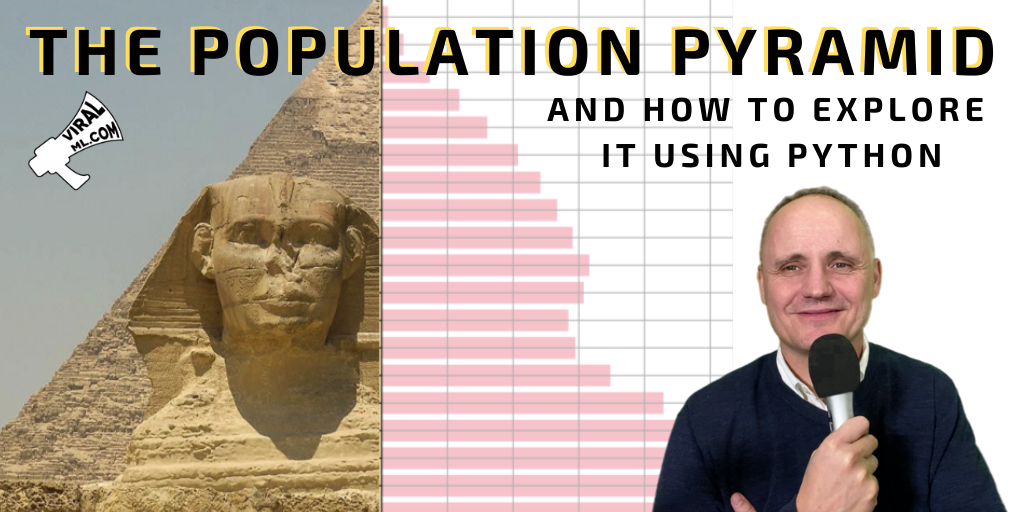

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
Image(filename='population pyramid thumb.png', width='80%')

Let's talk about population pyramids! Almost as mysterious as the pyramids of Giza where you have to dig deep to find the hidden treasures... well not really, but you definitely should dig and I'll show you how to dig using python and where to get curated and accurate data from the United Nations that covers most countries around the world! You'll even be able to dial back in time or dial forward into the future! Exciting!

Sign up for my newsletter so you can get my free classes!

It breaks down a population, for whatever zone, a town, country, continent, world, into even age buckets and charts them into a bar plot. Traditionally males go on the left and females on the right, and I even stereotyped the coloring, and I don't like stereotypes but as I have less than an hour to prep these videos... there can only be so much imagination spent.

As you can see, it forms a sideways distribution by gender and together with a sort of pyramid. A healthy society should form a pyramid, a bit like a pyramid scheme, with more younger people joining the workforce and taking care of a lesser amount of older people - but that isn't always the case.

There are 3 overaching groups:

#### Expansive

A healthy zone where there are more people joining the workforce and able to take care of their elders - challenges are having affordable education and enough jobs.

#### Constrictive

There are too many old people and not enough young to take care of them, this is going to be a burden on the working-age folks to take care of the older ones, you'll need a lot of healthcare, geriatric and palliative type care that is very time consuming and expensive.

#### Stationary - a sort of equilibirum.

Let's dig into the code and we won't cover too much of the analysis but if you take this on, you can take this very far and understand things better understand birth rates, fertility, aging populations, the types of pressures a society will face, human migrations, etc. 

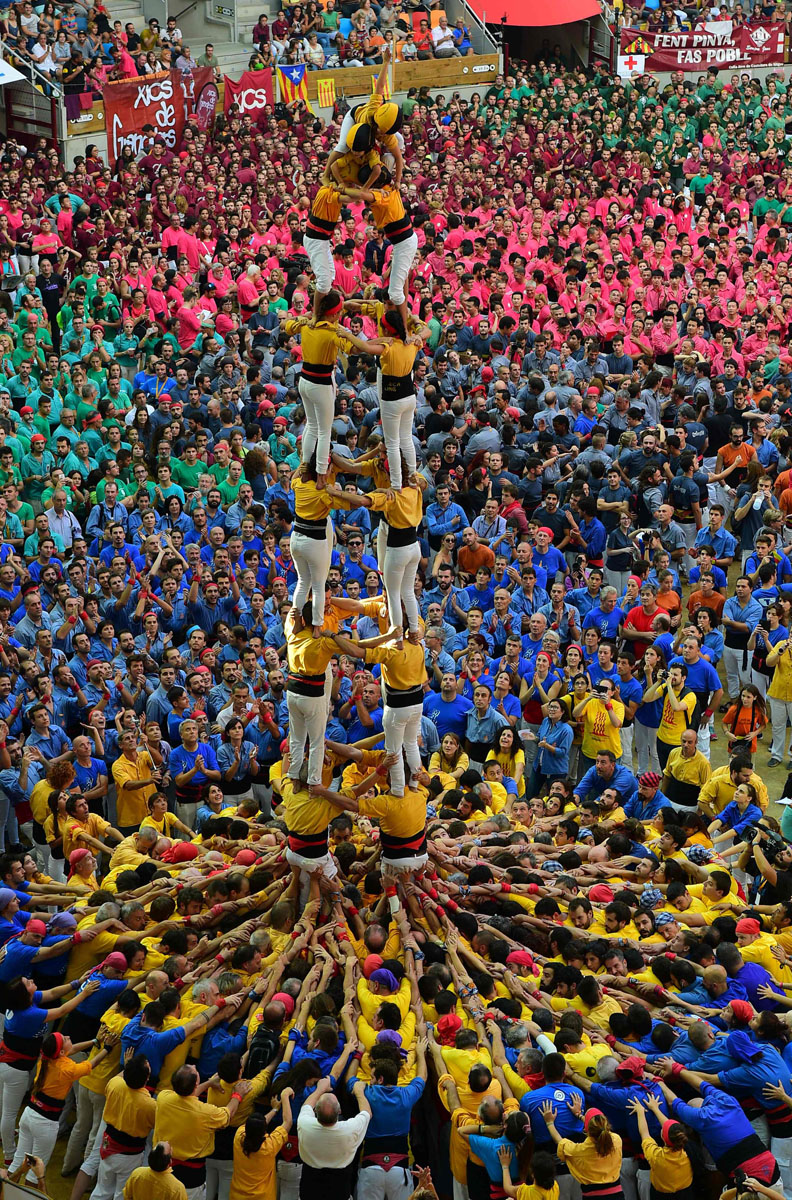

In [2]:
# Source: http://darkroom.baltimoresun.com/2016/10/building-human-towers-in-catalonia-spain/#1
Image(filename='Spain-Catalonia-Human-Towers-Castellers-10032016-18.jpg', width='50%')

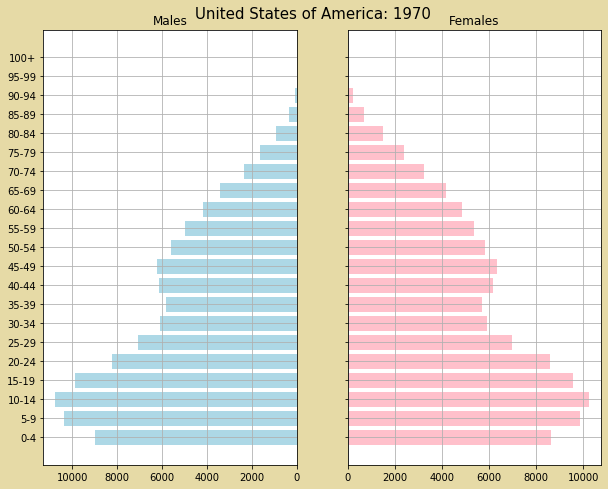

In [3]:
Image(filename='us_pop_pyr_1970.png', width='80%')

# Population Pyramid

https://en.wikipedia.org/wiki/Population_pyramid

"A population pyramid also called an "age-sex-pyramid", is a graphical illustration that shows the distribution of various age groups in a population (typically that of a country or region of the world), which forms the shape of a pyramid when the population is growing.[1] Males are conventionally shown on the left and females on the right, and they may be measured by the raw numbers or as a percentage of the total population. This tool can be used to visualize and age of a particular population.[2] It is also used in ecology to determine the overall age distribution of a population; an indication of the reproductive capabilities and likelihood of the continuation of a species."

### Get the data - U.N. Department of Economic and Social Affairs - Population Dynamics

https://population.un.org/wpp/Download/Standard/CSV/

Medium variant, annual, from 1950 to 2100 (CSV, 113.05 MB)

In [9]:
# Current top bottom up, top up down
import numpy as np
import pandas as pd

# URL ='https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_PopulationByAgeSex_Medium.csv'
# from urllib.request import urlretrieve

# Wait for 5 minutes to download the dataset
# urlretrieve(URL,'population.csv')
# pop_df = pd.read_csv('population.csv')
pop_df=pd.read_csv("WPP2019_PopulationByAgeSex_Medium.csv")

In [10]:
# Exploration Data Analysis EDA
print(pop_df.shape)
pop_df.head()

(1404753, 12)


,LocID,Location,VarID,Variant,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
0,4,Afghanistan,2,Medium,1950,1950.5,0-4,0,5,630.044,661.578,1291.622
1,4,Afghanistan,2,Medium,1950,1950.5,5-9,5,5,516.206,487.335,1003.541
2,4,Afghanistan,2,Medium,1950,1950.5,10-14,10,5,461.378,423.326,884.704
3,4,Afghanistan,2,Medium,1950,1950.5,15-19,15,5,414.369,369.363,783.732
4,4,Afghanistan,2,Medium,1950,1950.5,20-24,20,5,374.109,318.392,692.501


###  Plotting Population Pyramids


In [ ]:
# set -> unique country name
len(set(pop_df['Location']))

In [ ]:
sorted(list(set(pop_df['Location'] ) ) )

There is not only countries but continents etc...

In [ ]:
print(np.min(pop_df['Time']), np.max(pop_df['Time']))

In [ ]:
len(set(pop_df['Time']))

In [ ]:
# boolean table where Location is Japan
pop_df['Location']=='Japan'

In [ ]:
# subset of the dataframe where location is Japan, returns only the rows where country is Japan
pop_df[pop_df['Location']=='Japan']

In [ ]:
pop_df_tmp = pop_df[(pop_df['Location']=='Japan') & (pop_df['Time']==2020)]
pop_df_tmp = pop_df_tmp.sort_values('AgeGrpStart',ascending=True)
print(pop_df_tmp.shape)
pop_df_tmp.head()

In [ ]:
country = 'United States of America'
year = 1970

# subset of the main data set
pop_df_tmp = pop_df[(pop_df['Location']==country) & (pop_df['Time']==year)]
pop_df_tmp = pop_df_tmp.sort_values('AgeGrpStart',ascending=True)

# 2 subsets: 1 for male and 1 for female
y = range(0, len(pop_df_tmp))
x_male = pop_df_tmp['PopMale']
x_female = pop_df_tmp['PopFemale']

# max xlim
np.max(pop_df['PopMale'])
np.max(pop_df['PopFemale'])
max_x_scale = max(max(x_female), max(x_male))

In [ ]:
# largest population by age group in the US in 1970, 
# we dont know if it is male or fermale
# max xlim
print("male:", np.max(pop_df_tmp['PopMale']))
print("female:", np.max(pop_df_tmp['PopFemale']))
max_x_scale = max(max(x_female), max(x_male))
max_x_scale
# y
# for  i in y:
#     print(i)

### Please NOT run the two cells below for test

In [ ]:
# Test values of x and y axes  
x = np.arange(0, 8, 0.1) 
x

In [ ]:
# Create sin(x) function
y = np.sin(x)

# add labels
plt.xlabel('x')  
plt.ylabel('y')

# pyplot.figtext(x, y, string) 
plt.figtext(0.5, -0.1, "This is a sample example" + '\n' +"explaining figtext", fontsize = 10, ha='center') 

# plot the function
plt.plot(x, y)
plt.show()

### Resume from here

In [ ]:
# Create a figure and a set of subplots.
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10, 8))
fig.patch.set_facecolor('xkcd:Beige')
plt.figtext(0.5,0.9,country + ": " +  str(year), fontsize=15, ha='center')
plt.show()

In [ ]:
# axes[0] is male column
axes[0].set(title='Males')
# Make a horizontal bar plot.
axes[0].barh(y, x_male, align='center', color='lightblue')
# Set the x limits of the current axes.
axes[0].set(xlim=[0,max_x_scale])
# Invext x_axis just for males
axes[0].invert_xaxis()
# remove the grid
axes[0].grid()

fig

In [ ]:
# axes[1] is female column
axes[1].set(title='Females')
axes[1].barh(y, x_female, align='center', color='pink')
axes[1].set(xlim=[0,max_x_scale])
axes[1].grid()

fig

In [ ]:
# package the code in one function
def plot_poulation_pyramid(country, year):
    pop_df_tmp = pop_df[(pop_df['Location']==country) & (pop_df['Time']==year)]
    pop_df_tmp = pop_df_tmp.sort_values('AgeGrpStart',ascending=True)

    y = range(0, len(pop_df_tmp))
    x_male = pop_df_tmp['PopMale']
    x_female = pop_df_tmp['PopFemale']
    
    # max xlim
    max_x_scale = max(max(x_female), max(x_male))

    fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10, 8))

    fig.patch.set_facecolor('xkcd:Beige')
    plt.figtext(.5,.9,country + ": " +  str(year), fontsize=15, ha='center')


    axes[0].barh(y, x_male, align='center', color='lightblue')
    axes[0].set(title='Males')
    axes[0].set(xlim=[0,max_x_scale])
    axes[1].barh(y, x_female, align='center', color='pink')
    axes[1].set(title='Females')
    axes[1].set(xlim=[0,max_x_scale])
    axes[1].grid()
    axes[0].set(yticks=y, yticklabels=pop_df_tmp['AgeGrp'])
    axes[0].invert_xaxis()
    axes[0].grid()
    plt.show()

### USA in 1990

In [ ]:
country = 'United States of America'
year = 1990
plot_poulation_pyramid(country, year)

### Qatar in 2020

In [ ]:
country = 'Qatar'
year = 2020
plot_poulation_pyramid(country, year)

# Make a Matplotlib Animation

In [ ]:
country='Japan'
counter = 0

for yr in list(range(1950,2100,1)):
    year = yr
    pop_df_tmp = pop_df[(pop_df['Location']==country) & (pop_df['Time']==year)]
    pop_df_tmp = pop_df_tmp.sort_values('AgeGrpStart',ascending=True)

    y = range(0, len(pop_df_tmp))
    x_male = pop_df_tmp['PopMale']
    x_female = pop_df_tmp['PopFemale']
    
    # max xlim
    max_x_scale = max(max(x_female), max(x_male))

    fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10, 8))

    fig.patch.set_facecolor('xkcd:Beige')
    plt.figtext(.5,.9,country + ": " +  str(year), fontsize=30, ha='center')


    axes[0].barh(y, x_male, align='center', color='lightblue')
    axes[0].set(title='Males')
    axes[0].set(xlim=[0,max_x_scale])
    axes[1].barh(y, x_female, align='center', color='pink')
    axes[1].set(title='Females')
    axes[1].set(xlim=[0,max_x_scale])
    axes[1].grid()
    axes[0].set(yticks=y, yticklabels=pop_df_tmp['AgeGrp'])
    axes[0].invert_xaxis()
    axes[0].grid()
    
    
    plt.savefig('movie/anim_' + str(counter) + '.png')
    counter += 1

# Make a video out of it

In [ ]:
# Go to /movie folder
# if you need help installing FFMPEG:
# https://github.com/adaptlearning/adapt_authoring/wiki/Installing-FFmpeg

ffmpeg -framerate 10 -i "anim_%d.png" -pix_fmt yuv420p out.mp4